# Implementing K-Means clustering

  - A set of 2D data points are given (generated artificially)
  - Select the centroids initially randomly from the data points
  - Repeat until the cluster assignments change for less than 1% of the data points
  - Visualize the cluster assignments and centroids after each iteration

In [1]:
%matplotlib inline

In [2]:
import sys
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

Compute Eucledian distance between two points given as vectors (lists)

In [3]:
def dist(p1, p2):
    s = 0
    for i in range(len(p1)):
        s += math.pow(p1[i] - p2[i], 2)
    return math.sqrt(s)

Compute the distances of data points to the cluster centroids and assign to point to the cluster with the closest centroid

In [4]:
def clustering(points, centroids):
    clusters = []
    for p in points:
        # compute the distance to all cluster centroids and pick the minimum
        min_d = sys.maxsize  # closest centroid distance
        min_c = 0  # index of the closest centroid
        for i in range(len(centroids)):
            d = dist(p, centroids[i])
            if d < min_d:
                min_d = d
                min_c = i
        clusters.append(min_c)
    return clusters

Compute new centroids based on cluster assignments

In [5]:
def update_centroids(k, points, clusters):
    # First collect the list of points belonging to each cluster
    cpoints = [[] for i in range(k)]  # init list of lists
    for i in range(len(points)):
        c = clusters[i]  # cluster index
        cpoints[c].append(points[i])
        
    # Then compute the cluster centroids
    centroids = []  # centroid[i] is the centroid for cluster i
    for c in cpoints:
        centroids.append(np.average(c, axis=0).tolist())  # use numpy's averaging
    return centroids

Perform K-Means clustering on a set of data points given the user-specified parameter k

In [6]:
def kmeans(k, points):
    # Select K points as initial centroids
    centroids = []
    for i in range(k):
        j = random.randint(0, len(points))
        centroids.append(points[j])

    # The `clusters` list holds the cluster assignment (0..k-1) for each data point
    clusters = [0] * len(points)  # assign all points to one cluster
    changed = len(points)
        
    # Repeat until the cluster assignments change for less than 1% of the data points
    iter = 0
    while changed > len(points)*0.01:
        iter += 1  # Count iterarions
        clusters_old = list(clusters)  # save "old" cluster assignments

        # Form K clusters by assigning each point to its closest centroid
        clusters = clustering(points, centroids)

        # Visualize the cluster assignments and centroids
        plt.clf()
        plt.title("Iteration " + str(iter))
        plt.scatter([x[0] for x in points], [x[1] for x in points], c=clusters, marker='o', s=50)
        plt.scatter([x[0] for x in centroids], [x[1] for x in centroids], c=range(k), marker="+", s=250)
        plt.show()
    
        # Recompute the centroid of each cluster
        centroids = update_centroids(k, points, clusters)

        # Count how many points have changed clusters
        changed = 0
        for i in range(len(clusters)):
            if clusters[i] != clusters_old[i]:
                changed += 1

## Main

Generate random data points

In [7]:
N = 200
points, clusters = make_blobs(n_samples=N, centers=3, n_features=2, cluster_std=0.8, random_state=0)
points = np.array(points).tolist()

Perform clustering

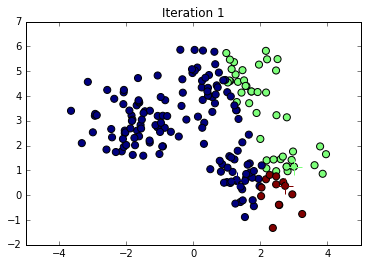

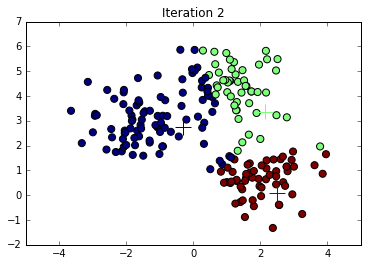

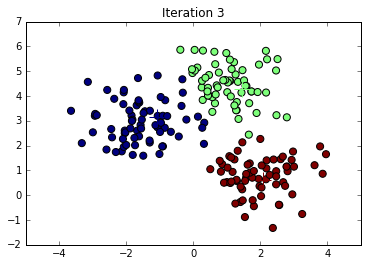

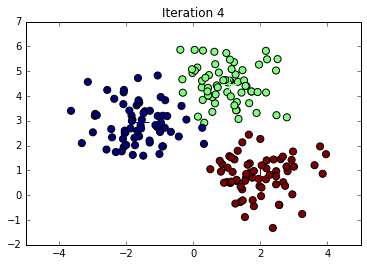

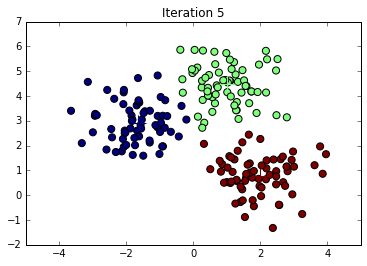

In [8]:
kmeans(3, points)

Visualize the 'true' clusters

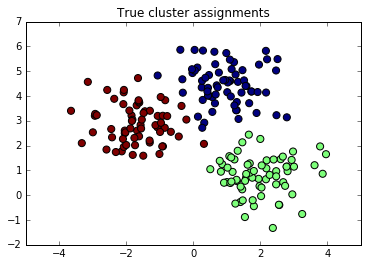

In [9]:
plt.clf()
plt.scatter([x[0] for x in points], [x[1] for x in points], c=clusters, marker='o', s=50)
plt.title("True cluster assignments")
plt.show()